In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch
experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10**4,
    dataset_parameters=dict(number_of_features=10, number_of_classes=2),
    dataloader_parameters=dict(batch_size=1024, shuffle=True),
    pushforward_operator_name="amortized_neural_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        potential_to_estimate_with_neural_network="u",
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 100, Potential Objective: 1.271, Amortization Objective: 0.549, LR: 0.010000: 100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


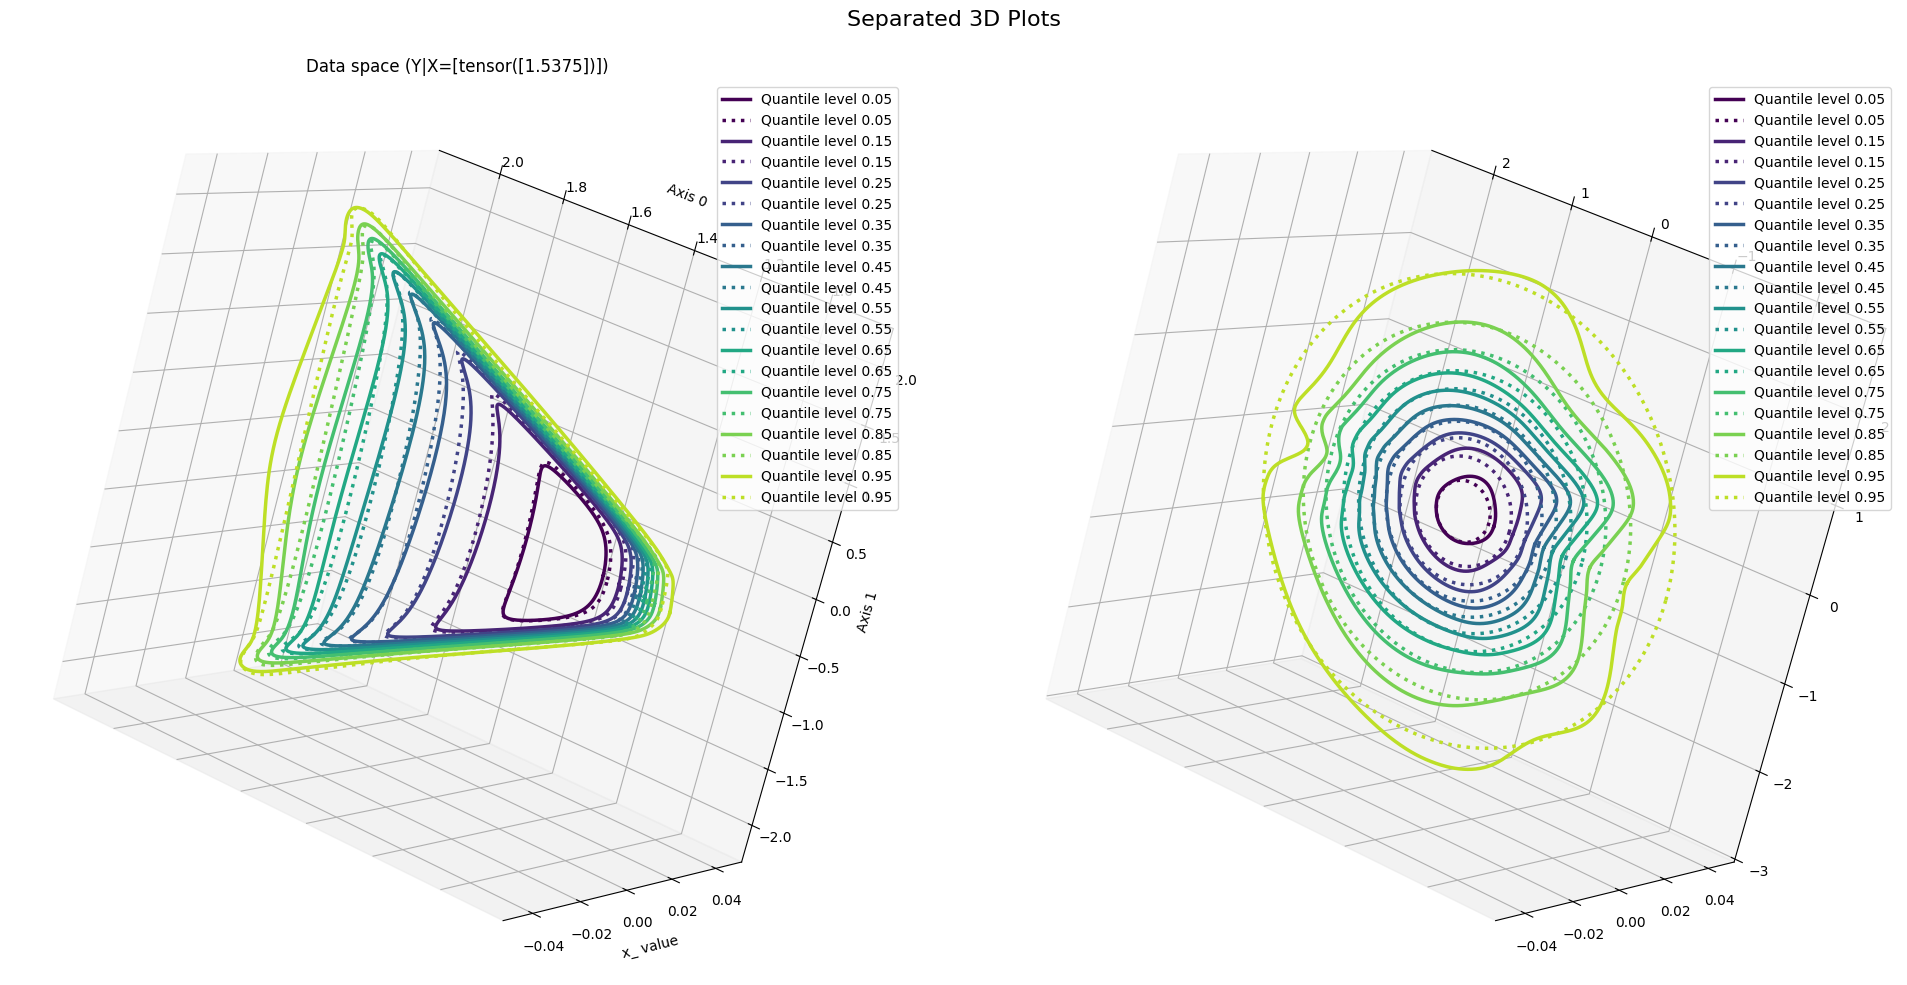

In [ ]:
%matplotlib inline
from datasets import PICNN_FNLVQR_Star, PICNN_FNLVQR_Banana
from utils.plot import plot_quantile_levels_from_dataset

dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=dataset.sample_covariates(1),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)